In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
import seaborn as sns

import trompy as tp

colors_PVH = "#219C90"
colors_VMH  = "#90219c"

colors = [colors_PVH, colors_VMH]

cmap = "RdBu_r"

In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    PVH = pickle.load(handle)

with open(DATAFOLDER / "HL3_restricted_dark.pickle", 'rb') as handle:
    VMH = pickle.load(handle)    

In [3]:
PVH_list_of_mice = []
VMH_list_of_mice = []

mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                    "HL202", "HL205", "HL206", "HL211",
                    "HL301", "HL304", "HL305"]

#"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
#HL 306, 308 have no virus
#HL301, HL304, HL305 have poor fiber placement
#HL313 - HL318 are control mice


for key, val in PVH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in PVH_list_of_mice:
            PVH_list_of_mice.append(val["mouse_ID"])
        
for key, val in VMH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in VMH_list_of_mice:
            VMH_list_of_mice.append(val["mouse_ID"])

In [4]:
def get_snips(data, mice):

    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in mice:
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_full

In [14]:
def get_snips(data, mice):
    all_snips = []  # List to collect snips for all mice
    kwargs = {"bins": 150, "trial_length": 15, "baseline_length": 5}
    pre = 5
    post = 10
    mineventlength = 8
    binlength = 0.1
    for mouse in mice:
        snips_full = []  # List to collect snips for the current mouse
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                if len(val["licks"]) < 10:
                    continue
                lickdata = tp.lickCalc(val["licks"], minrunlength=3)
                snipper = tp.Snipper(
                    val["corrected"],
                    lickdata["rStart"],
                    end=lickdata["rEnd"],
                    fs=val["fs"],
                    pre=pre,
                    post=post,
                    binlength=binlength,
                    zscore=True
                )
                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6, 2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)
        try:
            snips_full = np.vstack(snips_full)
            all_snips.append(snips_full)  # Append the snips for this mouse
            print("adding this mouse")
        except:
            print("no snips to concatenate")
    # Concatenate all snips across all mice into a single array
    if all_snips:
        all_snips = np.vstack(all_snips)
    else:
        all_snips = np.array([])  # Return an empty array if no snips were collected
    return all_snips

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse


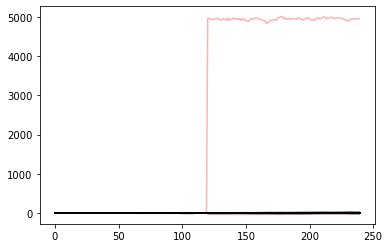

In [15]:
PVH_snips_mean_full = get_snips(PVH, PVH_list_of_mice)
VMH_snips_mean_full = get_snips(VMH, VMH_list_of_mice)

In [16]:
len(PVH_snips_mean_full)

248

In [27]:
len(VMH_snips_mean_full)

238

In [17]:
pre = 5
post = 10
mineventlength=8
binlength=0.1

eventbalance=[6,2]

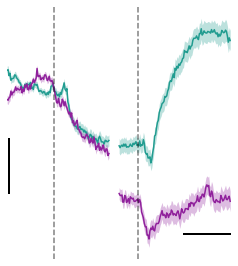

In [18]:
f, [ax1, ax2] =plt.subplots(ncols=2,
                            figsize=[3.4,3.5],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})

ax2.remove()

try:
    assert(eventbalance[0] + eventbalance[1] == mineventlength)
    early_t = eventbalance[0]
    late_t = eventbalance[1]
except:
    print("No event balance given. Using default 50-50 split.")
    early_t = mineventlength/2
    late_t = mineventlength/2
            
bins_early = int((pre + early_t) / binlength)
bins_late = int((post + late_t) / binlength)

#PVH
x1_PVH = np.arange(0,bins_early)
x2_PVH= np.arange(PVH_snips_mean_full.shape[1] - bins_late, PVH_snips_mean_full.shape[1])

mean_PVH = np.mean(PVH_snips_mean_full, axis=0)
error_values_PVH = np.std(PVH_snips_mean_full, axis=0) / np.sqrt(len(PVH_snips_mean_full))

ax1.plot(x1_PVH, mean_PVH[:bins_early], color=colors_PVH)
ax1.plot(x2_PVH, mean_PVH[-bins_late:], color=colors_PVH)

ax1.fill_between(x1_PVH, mean_PVH[:bins_early]-error_values_PVH[:bins_early], 
                mean_PVH[:bins_early]+error_values_PVH[:bins_early], 
                color=colors_PVH, alpha=0.3,
                linewidth=0)
ax1.fill_between(x2_PVH, mean_PVH[-bins_late:]-error_values_PVH[-bins_late:], 
                mean_PVH[-bins_late:]+error_values_PVH[-bins_late:], 
                color=colors_PVH, alpha=0.3,
                linewidth=0)

#VMH
x1_VMH = np.arange(0,bins_early)
x2_VMH= np.arange(VMH_snips_mean_full.shape[1] - bins_late, VMH_snips_mean_full.shape[1])

mean_VMH = np.mean(VMH_snips_mean_full, axis=0)
error_values_VMH = np.std(VMH_snips_mean_full, axis=0) / np.sqrt(len(VMH_snips_mean_full))

ax1.plot(x1_VMH, mean_VMH[:bins_early], color=colors_VMH)
ax1.plot(x2_VMH, mean_VMH[-bins_late:], color=colors_VMH)

ax1.fill_between(x1_VMH, mean_VMH[:bins_early]-error_values_VMH[:bins_early], 
                mean_VMH[:bins_early]+error_values_VMH[:bins_early], 
                color=colors_VMH, alpha=0.3,
                linewidth=0)
ax1.fill_between(x2_VMH, mean_VMH[-bins_late:]-error_values_VMH[-bins_late:], 
                mean_VMH[-bins_late:]+error_values_VMH[-bins_late:], 
                color=colors_VMH, alpha=0.3,
                linewidth=0)


for spine in ["top", "right", "left", "bottom"]:
    ax1.spines[spine].set_visible(False)

ax1.set_yticks([])
ax1.set_xticks([])

ax1.set_xlim([0,240])

transform = blended_transform_factory(ax1.transData, ax1.transAxes)
ax1.plot([190,240], [0.10, 0.10], linewidth=2, color="k", transform=transform)


ax1.plot([2,2], [-1, -2], linewidth=2, color="k")

ax1.axvline(50, color="k", linestyle="--", alpha=0.5)
ax1.axvline(140, color="k", linestyle="--", alpha=0.5)

#f.savefig(FIGSFOLDER / "PVH_vs_VMH_restricted.pdf")

In [31]:
PVH_snips_mean_full.shape

(248, 240)

In [44]:
def sort_snips_by_time_period(snips, time_period):

    start, end = time_period
    time_period_indices = range(start, end)

    time_period_means = np.mean(snips[:, time_period_indices], axis=1)

    sorted_indices = np.argsort(-time_period_means)

    sorted_snips = snips[sorted_indices]
    return sorted_snips

In [45]:
time_period = (140, 240)

sorted_snips_PVH = sort_snips_by_time_period(PVH_snips_mean_full, time_period)
sorted_snips_VMH = sort_snips_by_time_period(VMH_snips_mean_full, time_period)


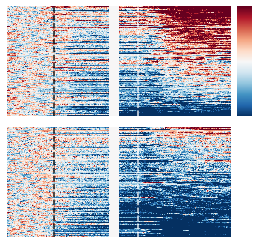

In [46]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[3.4,3.2],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})



sns.heatmap(sorted_snips_PVH, ax=ax1, cbar_ax= ax2, cmap=cmap, vmax=3, vmin=-3,
            cbar_kws={"ticks": []})
sns.heatmap(sorted_snips_VMH, ax=ax3, cbar_ax= ax4, cmap=cmap, vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})

ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="k", linestyle="--", alpha=0.9)
ax1.axvline(140, color="white", linestyle="--", alpha=0.9)

ax3.set_yticks([])
ax3.set_xticks([])
ax3.axvline(50, color="black", linestyle="--", alpha=0.9)
ax3.axvline(140, color="white", linestyle="--", alpha=0.9)

#f.savefig(FIGSFOLDER / "PVH_vs_VMH_heatmap.pdf")


In [20]:
def consecutive_threshold(significant_times, min_consecutive):
    significant_periods = []
    start = None
    for i, is_significant in enumerate(significant_times):
        if is_significant:
            if start is None:
                start = i
        else:
            if start is not None:
                if i - start >= min_consecutive:
                    significant_periods.append((start, i))
                start = None
    # Check if the last period is significant
    if start is not None and len(significant_times) - start >= min_consecutive:
        significant_periods.append((start, len(significant_times)))
    return significant_periods

def analyze_peri_event_activity_with_bootstrapping(data, n_bootstraps=1000, min_consecutive=6):
    bootstrap_means = np.zeros((n_bootstraps, data.shape[1]))
    
    # Perform bootstrapping (resample with replacement)
    for i in range(n_bootstraps):
        resample_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
        bootstrap_means[i, :] = np.mean(data[resample_indices, :], axis=0)
    
    # Calculate the 2.5th and 97.5th percentiles for the bootstrapped confidence intervals
    ci_lower = np.percentile(bootstrap_means, 2.5, axis=0)
    ci_upper = np.percentile(bootstrap_means, 97.5, axis=0)
    
    # Calculate the mean across all bootstrap samples (for plotting)
    means = np.mean(bootstrap_means, axis=0)
    
    # Flag the time points where the CI does not contain 0
    significant_above_zero = ci_lower > 0  # Significantly greater than zero
    significant_below_zero = ci_upper < 0  # Significantly less than zero
    # Combine significant times above and below zero
    significant_times = significant_above_zero | significant_below_zero
    # Apply consecutive thresholding
    significant_periods_above = consecutive_threshold(significant_above_zero, min_consecutive)
    significant_periods_below = consecutive_threshold(significant_below_zero, min_consecutive)
    significant_periods = consecutive_threshold(significant_times, min_consecutive)
    
    # Prepare the results dictionary
    results = {
        'significant_times_above': significant_above_zero,
        'significant_times_below': significant_below_zero,
        'significant_periods_above': significant_periods_above,
        'significant_periods_below': significant_periods_below,
        'significant_periods': significant_periods,
        'means': means,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }
    return results



In [47]:
bootstraps = 1000
min_consecutive = 6

BS_PVH = analyze_peri_event_activity_with_bootstrapping(PVH_snips_mean_full, n_bootstraps=bootstraps, min_consecutive=min_consecutive)
BS_VMH = analyze_peri_event_activity_with_bootstrapping(VMH_snips_mean_full, n_bootstraps=bootstraps, min_consecutive=min_consecutive)


In [56]:
# new function, data1 and data2, do bootstrapping for both, to get upper and lower CI for both, then find singificant periods by seeing whether the CI overlap
#is CI_1_lower smaller than CI_2_uppoer?
# or is CI_2_lower smaller than CI_1_upper?

def compare_peri_event_activity(data1, data2, n_bootstraps=1000, min_consecutive=6):
    # Initialize arrays to store bootstrap means
    bootstrap_means1 = np.zeros((n_bootstraps, data1.shape[1]))
    bootstrap_means2 = np.zeros((n_bootstraps, data2.shape[1]))
    
    # Perform bootstrapping for both datasets
    for i in range(n_bootstraps):
        resample_indices1 = np.random.choice(data1.shape[0], size=data1.shape[0], replace=True)
        resample_indices2 = np.random.choice(data2.shape[0], size=data2.shape[0], replace=True)
        
        bootstrap_means1[i, :] = np.mean(data1[resample_indices1, :], axis=0)
        bootstrap_means2[i, :] = np.mean(data2[resample_indices2, :], axis=0)
    
    # Calculate the 2.5th and 97.5th percentiles for the bootstrapped confidence intervals
    ci_lower1 = np.percentile(bootstrap_means1, 2.5, axis=0)
    ci_upper1 = np.percentile(bootstrap_means1, 97.5, axis=0)
    ci_lower2 = np.percentile(bootstrap_means2, 2.5, axis=0)
    ci_upper2 = np.percentile(bootstrap_means2, 97.5, axis=0)
    
    # Identify significant periods where CIs do not overlap
    significant_non_overlap = (ci_lower1 > ci_upper2) | (ci_lower2 > ci_upper1)
    
    # Apply consecutive thresholding
    significant_periods_non_overlap = consecutive_threshold(significant_non_overlap, min_consecutive)
    
    # Prepare the results dictionary
    results = {
        'ci_lower1': ci_lower1,
        'ci_upper1': ci_upper1,
        'ci_lower2': ci_lower2,
        'ci_upper2': ci_upper2,
        'significant_non_overlap': significant_non_overlap,
        'significant_periods_non_overlap': significant_periods_non_overlap
    }
    return results

In [61]:
sig_no_overlap= compare_peri_event_activity(PVH_snips_mean_full, VMH_snips_mean_full)

In [63]:
BS_PVH

{'significant_times_above': array([ True,  True,  True,  True, False, False, False, False,  True,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, 

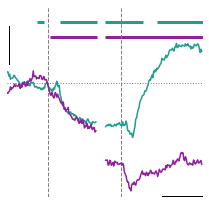

In [22]:
#show confidence interval fill-betweween

data_PVH = BS_PVH["means"]
data_VMH = BS_VMH["means"]

indices = np.arange(len(data_PVH))

mask1 = indices <= 109
mask2 = indices >= 121

f, ax = plt.subplots(figsize=[3.5, 3.5])

ax.plot(indices[mask1], data_PVH[mask1], color=colors_PVH)
ax.plot(indices[mask2], data_PVH[mask2], color=colors_PVH)
ax.plot(indices[mask1], data_VMH[mask1], color=colors_VMH)
ax.plot(indices[mask2], data_VMH[mask2], color=colors_VMH)

significant_periods_PVH = BS_PVH['significant_periods']
significant_periods_VMH = BS_VMH['significant_periods']

for start, end in significant_periods_PVH:
    ax.hlines(y=1.6, xmin=start, xmax=end, color=colors_PVH, linewidth=3)
for start, end in significant_periods_VMH:
    ax.hlines(y=1.2, xmin=start, xmax=end, color=colors_VMH, linewidth=3)
    
ax.hlines(y=0, xmin=0, xmax=240, color="grey", linewidth=1, linestyle="dotted")
ax.vlines(x=50, ymin=-3, ymax=4.5, color="grey", linewidth=1, linestyle="--")
ax.vlines(x=140, ymin=-3, ymax=4.5, color="grey", linewidth=1, linestyle="--")

ax.plot([2, 2], [0.5, 1.5], linewidth=1, color="k")

ax.hlines(y=-3, xmin=190, xmax=240, color="k", linewidth=2)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
    
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim(-3, 2)
ax.set_xlim(0, 240)
plt.show()

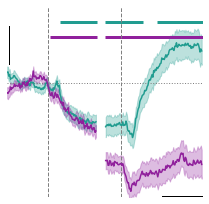

In [65]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming BS_PVH and BS_VMH are dictionaries containing your data
data_PVH = BS_PVH["means"]
data_VMH = BS_VMH["means"]
ci_lower_PVH = BS_PVH["ci_lower"]
ci_upper_PVH = BS_PVH["ci_upper"]
ci_lower_VMH = BS_VMH["ci_lower"]
ci_upper_VMH = BS_VMH["ci_upper"]
indices = np.arange(len(data_PVH))
mask1 = indices <= 109
mask2 = indices >= 121
f, ax = plt.subplots(figsize=[3.5, 3.5])
# Plot the data
ax.plot(indices[mask1], data_PVH[mask1], color=colors_PVH, label='PVH')
ax.plot(indices[mask2], data_PVH[mask2], color=colors_PVH)
ax.plot(indices[mask1], data_VMH[mask1], color=colors_VMH, label='VMH')
ax.plot(indices[mask2], data_VMH[mask2], color=colors_VMH)
# Plot the confidence intervals using fill_between
ax.fill_between(indices[mask1], ci_lower_PVH[mask1], ci_upper_PVH[mask1], color=colors_PVH, alpha=0.3)
ax.fill_between(indices[mask2], ci_lower_PVH[mask2], ci_upper_PVH[mask2], color=colors_PVH, alpha=0.3)
ax.fill_between(indices[mask1], ci_lower_VMH[mask1], ci_upper_VMH[mask1], color=colors_VMH, alpha=0.3)
ax.fill_between(indices[mask2], ci_lower_VMH[mask2], ci_upper_VMH[mask2], color=colors_VMH, alpha=0.3)
# Highlight significant periods
significant_periods_PVH = BS_PVH['significant_periods']
significant_periods_VMH = BS_VMH['significant_periods']
for start, end in significant_periods_PVH:
    ax.hlines(y=1.6, xmin=start, xmax=end, color=colors_PVH, linewidth=3)
for start, end in significant_periods_VMH:
    ax.hlines(y=1.2, xmin=start, xmax=end, color=colors_VMH, linewidth=3)
# Add additional plot elements
ax.hlines(y=0, xmin=0, xmax=240, color="grey", linewidth=1, linestyle="dotted")
ax.vlines(x=50, ymin=-3, ymax=4.5, color="grey", linewidth=1, linestyle="--")
ax.vlines(x=140, ymin=-3, ymax=4.5, color="grey", linewidth=1, linestyle="--")
ax.plot([2, 2], [0.5, 1.5], linewidth=1, color="k")
ax.hlines(y=-3, xmin=190, xmax=240, color="k", linewidth=2)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim(-3, 2)
ax.set_xlim(0, 240)

plt.show()

In [23]:
# PROPORTION OF TIME ABOVE AND BELOW

def calculate_proportions(significant_periods_above, significant_periods_below, epochs):
    # Function to calculate the overlap between two intervals
    def calculate_overlap(interval1, interval2):
        start1, end1 = interval1
        start2, end2 = interval2
        overlap_start = max(start1, start2)
        overlap_end = min(end1, end2)
        return max(0, overlap_end - overlap_start)
    # Initialize results for both above and below zero
    epoch_results_above = {key: {'duration': 0, 'proportion': 0} for key in epochs}
    epoch_results_below = {key: {'duration': 0, 'proportion': 0} for key in epochs}
    # Calculate durations for periods above zero
    for period in significant_periods_above:
        for epoch_name, epoch_intervals in epochs.items():
            if isinstance(epoch_intervals, list):
                for interval in epoch_intervals:
                    overlap = calculate_overlap(period, interval)
                    epoch_results_above[epoch_name]['duration'] += overlap
            else:
                overlap = calculate_overlap(period, epoch_intervals)
                epoch_results_above[epoch_name]['duration'] += overlap
    # Calculate durations for periods below zero
    for period in significant_periods_below:
        for epoch_name, epoch_intervals in epochs.items():
            if isinstance(epoch_intervals, list):
                for interval in epoch_intervals:
                    overlap = calculate_overlap(period, interval)
                    epoch_results_below[epoch_name]['duration'] += overlap
            else:
                overlap = calculate_overlap(period, epoch_intervals)
                epoch_results_below[epoch_name]['duration'] += overlap
    # Calculate proportions for both above and below zero
    for epoch_name, epoch_intervals in epochs.items():
        if isinstance(epoch_intervals, list):
            total_epoch_duration = sum(end - start for start, end in epoch_intervals)
        else:
            total_epoch_duration = epoch_intervals[1] - epoch_intervals[0]
        epoch_results_above[epoch_name]['proportion'] = epoch_results_above[epoch_name]['duration'] / total_epoch_duration
        epoch_results_below[epoch_name]['proportion'] = epoch_results_below[epoch_name]['duration'] / total_epoch_duration
    # Extract and return proportions for both above and below zero
    proportions_above = {epoch_name: results['proportion'] for epoch_name, results in epoch_results_above.items()}
    proportions_below = {epoch_name: results['proportion'] for epoch_name, results in epoch_results_below.items()}
    return proportions_above, proportions_below


In [24]:
epochs = {
    'baseline': (0, 50),
    'lick': [(50, 110), (120, 140)],
    'post': (140, 240),
}

PVH_proportions_above,PVH_proportions_below = calculate_proportions(BS_PVH['significant_periods_above'],BS_PVH['significant_periods_below'],epochs)
VMH_proportions_above, VMH_proportions_below = calculate_proportions(BS_VMH['significant_periods_above'],BS_VMH['significant_periods_below'],epochs)

In [25]:
def plot_proportions(PVH_proportions, VMH_proportions, figsize=(0.85, 0.85), barWidth=0.3):
    f, ax = plt.subplots(figsize=figsize)
    PVH = [
       PVH_proportions["baseline"],
        PVH_proportions["lick"],
        PVH_proportions["post"]
    ]
    VMH = [
        VMH_proportions["baseline"],
        VMH_proportions["lick"],
        VMH_proportions["post"]
    ]
    br1 = np.arange(len(PVH))
    br2 = br1 + barWidth
    ax.bar(br1, PVH, color=colors_PVH, width=barWidth)
    ax.bar(br2, VMH, color=colors_VMH, width=barWidth)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([])
    ax.set_xticks([])
    plt.show()
    return f


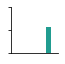

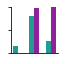

In [26]:
#remove
#NR proportion of time ABOVE 0
f= plot_proportions(PVH_proportions_above,VMH_proportions_above)
f= plot_proportions(PVH_proportions_below,VMH_proportions_below)

AUC 

In [10]:
epochs = {
    'baseline': (10, 50),
    'lick_early': (50, 110),
    'lick_late': (120, 140),
    'early_post': (140, 190),
    'late_post': (190, 240)
}

def calculate_auc_by_epoch(data, epochs):

    # Initialize results
    auc_baseline = []
    auc_lick_early = []
    auc_lick_late = []
    auc_early_post = []
    auc_late_post = []

    # Calculate AUCs for each snippet
    for snip in data:
        # Calculate AUC for each epoch and normalize
        baseline_auc = np.trapz(snip[epochs['baseline'][0]:epochs['baseline'][1]]) / (epochs['baseline'][1] - epochs['baseline'][0])
        lick_early_auc = np.trapz(snip[epochs['lick_early'][0]:epochs['lick_early'][1]]) / (epochs['lick_early'][1] - epochs['lick_early'][0])
        lick_late_auc = np.trapz(snip[epochs['lick_late'][0]:epochs['lick_late'][1]]) / (epochs['lick_late'][1] - epochs['lick_late'][0])
        early_post_auc = np.trapz(snip[epochs['early_post'][0]:epochs['early_post'][1]]) / (epochs['early_post'][1] - epochs['early_post'][0])
        late_post_auc = np.trapz(snip[epochs['late_post'][0]:epochs['late_post'][1]]) / (epochs['late_post'][1] - epochs['late_post'][0])
        
        # Append to respective lists
        auc_baseline.append(baseline_auc)
        auc_lick_early.append(lick_early_auc)
        auc_lick_late.append(lick_late_auc)
        auc_early_post.append(early_post_auc)
        auc_late_post.append(late_post_auc)
    
    return auc_baseline, auc_lick_early, auc_lick_late, auc_early_post, auc_late_post


In [11]:
PVH_baseline_AUC, PVH_early_lick_AUC, PVH_late_lick_AUC,PVH_early_post_AUC, PVH_late_post_AUC = calculate_auc_by_epoch(PVH_snips_mean_full, epochs)
VMH_baseline_AUC, VMH_early_lick_AUC, VMH_late_lick_AUC,VMH_early_post_AUC, VMH_late_post_AUC = calculate_auc_by_epoch(VMH_snips_mean_full, epochs)

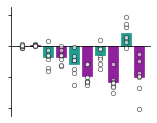

In [27]:
f,ax=plt.subplots(figsize=(2.5,2))

tp.barscatter([PVH_baseline_AUC, VMH_baseline_AUC,
                PVH_early_lick_AUC,VMH_early_lick_AUC,
                PVH_late_lick_AUC,VMH_late_lick_AUC,
                PVH_early_post_AUC,VMH_early_post_AUC,
              PVH_late_post_AUC,VMH_late_post_AUC],
              barfacecolor=[colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH],
              barfacecolor_option="individual",
              baredgecolor=[colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH],
              baredgecolor_option="individual",
              scattersize=20,
              scatteralpha=0.6,
              scatterlinecolor= "grey",
              ax=ax)

ax.set_yticklabels([])
ax.set_ylim([-4.5, 2.5])
ax.set_yticks([-4, -2, 0, 2])

f.savefig(FIGSFOLDER /  "PVH_vs_VMH_AUC_NEW.pdf")